<a href="https://colab.research.google.com/github/ahmadcah/project_pembelajaran_mesin_2018-198/blob/main/GoogleColab/trainBirdsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds

splits = ['train', 'test[:50%]', 'test[50%:]']
splits, info = tfds.load('CaltechBirds2011', split=splits, shuffle_files=True, with_info=True)
(train_examples, validation_examples, test_examples) = splits
train_len = len(list(train_examples))
validation_len = len(list(validation_examples))
test_len = len(list(test_examples))
print(train_len)
print(validation_len)
print(test_len)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteWFMJ0Z/caltech_birds2011-train.tfrecord


  0%|          | 0/5994 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteWFMJ0Z/caltech_birds2011-test.tfrecord


  0%|          | 0/5794 [00:00<?, ? examples/s]

Dataset caltech_birds2011 downloaded and prepared to /root/tensorflow_datasets/caltech_birds2011/0.1.1. Subsequent calls will reuse this data.
5994
2897
2897


In [ ]:
import tensorflow as tf

num_examples = 500 
num_classes = 200
BATCH_SIZE =  16 
IMAGE_SIZE = (250,250)

def format_image(features):
  image = features['image']
  image = tf.image.resize(image, IMAGE_SIZE) / 255.0
  return  image, features['label']

train_batches = train_examples.shuffle(num_examples).map(format_image).batch(BATCH_SIZE)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE)
test_batches = test_examples.map(format_image).batch(BATCH_SIZE)

In [ ]:
import tensorflow as tf

num_examples = 500 
num_classes = 200
BATCH_SIZE = 25
IMAGE_SIZE = (250,250)

def format_image(features):
  image = features['image']
  image = tf.image.resize(image, IMAGE_SIZE) / 255.0
  return  image, features['label']

train_batches = train_examples.shuffle(num_examples).map(format_image).batch(BATCH_SIZE)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE)
test_batches = test_examples.map(format_image).batch(BATCH_SIZE)

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)), 
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(200, activation='softmax')  
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [ ]:
callbacksEarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
class CallbackAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('acc') > 0.98 and logs.get('val_acc') > 0.98:
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
H1 = model1.fit(train_batches,
                epochs=100, 
                validation_data=validation_batches,
                callbacks=[callbacksEarlyStopping, CallbackAccuracy()])

Epoch 1/100
240/240 [==============================] - 65s 139ms/step - loss: 5.2735 - acc: 0.0052 - val_loss: 5.1108 - val_acc: 0.0138
Epoch 2/100
240/240 [==============================] - 33s 131ms/step - loss: 4.9824 - acc: 0.0133 - val_loss: 4.8745 - val_acc: 0.0197
Epoch 3/100
240/240 [==============================] - 32s 130ms/step - loss: 4.7542 - acc: 0.0304 - val_loss: 4.7438 - val_acc: 0.0362
Epoch 4/100
240/240 [==============================] - 33s 131ms/step - loss: 4.5958 - acc: 0.0450 - val_loss: 4.6265 - val_acc: 0.0418
Epoch 5/100
240/240 [==============================] - 33s 131ms/step - loss: 4.4182 - acc: 0.0614 - val_loss: 4.6034 - val_acc: 0.0487
Epoch 6/100
240/240 [==============================] - 32s 130ms/step - loss: 4.2336 - acc: 0.0883 - val_loss: 4.4258 - val_acc: 0.0794
Epoch 7/100
240/240 [==============================] - 33s 131ms/step - loss: 4.0211 - acc: 0.1128 - val_loss: 4.2565 - val_acc: 0.0946
Epoch 8/100
240/240 [===========================

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=2), 
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=2), 
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(200, activation='softmax')  
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 29, 29, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
H2 = model2.fit(train_batches,
                epochs=100,
                validation_data=validation_batches,
                callbacks=[callbacksEarlyStopping, CallbackAccuracy()])

Epoch 1/100
240/240 [==============================] - 33s 134ms/step - loss: 5.2774 - acc: 0.0070 - val_loss: 5.2100 - val_acc: 0.0107
Epoch 2/100
240/240 [==============================] - 33s 132ms/step - loss: 5.1759 - acc: 0.0085 - val_loss: 5.1573 - val_acc: 0.0117
Epoch 3/100
240/240 [==============================] - 33s 132ms/step - loss: 5.1197 - acc: 0.0102 - val_loss: 5.1407 - val_acc: 0.0097
Epoch 4/100
240/240 [==============================] - 33s 132ms/step - loss: 5.0808 - acc: 0.0097 - val_loss: 5.1205 - val_acc: 0.0117
Epoch 5/100
240/240 [==============================] - 33s 130ms/step - loss: 5.0295 - acc: 0.0135 - val_loss: 5.0760 - val_acc: 0.0148
Epoch 6/100
240/240 [==============================] - 33s 130ms/step - loss: 4.9546 - acc: 0.0187 - val_loss: 5.0184 - val_acc: 0.0217
Epoch 7/100
240/240 [==============================] - 33s 132ms/step - loss: 4.8792 - acc: 0.0227 - val_loss: 4.9810 - val_acc: 0.0255
Epoch 8/100
240/240 [===========================

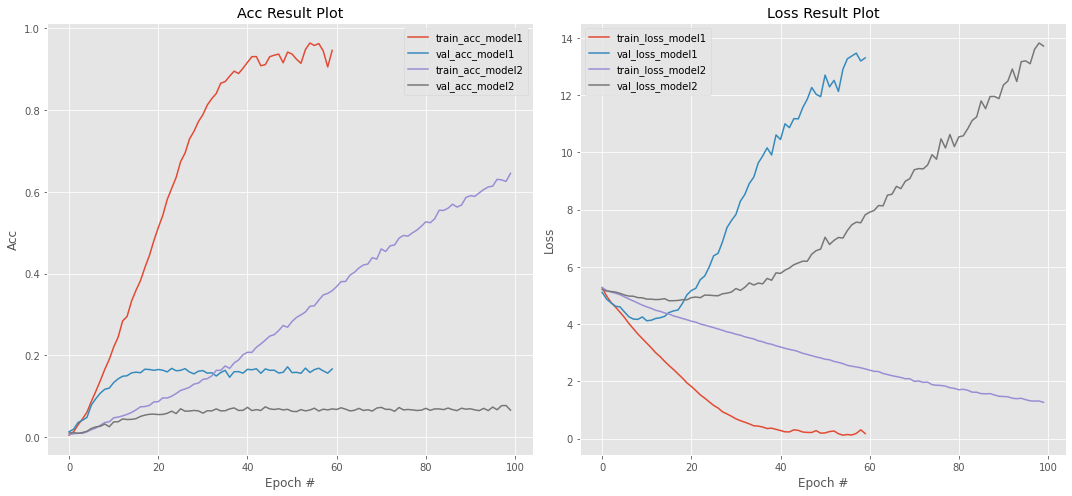

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].plot(np.arange(0, 60), H1.history["acc"], label="train_acc_model1")
axes[0].plot(np.arange(0, 60), H1.history["val_acc"], label="val_acc_model1")
axes[0].plot(np.arange(0, 100), H2.history["acc"], label="train_acc_model2")
axes[0].plot(np.arange(0, 100), H2.history["val_acc"], label="val_acc_model2")
axes[0].legend()
axes[1].plot(np.arange(0, 60), H1.history["loss"], label="train_loss_model1")
axes[1].plot(np.arange(0, 60), H1.history["val_loss"], label="val_loss_model1")
axes[1].plot(np.arange(0, 100), H2.history["loss"], label="train_loss_model2")
axes[1].plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss_model2")
axes[1].legend()
plt.setp(axes[0],title='Acc Result Plot', xlabel="Epoch #", ylabel="Acc")
plt.setp(axes[1],title='Loss Result Plot', xlabel="Epoch #", ylabel="Loss")
fig.tight_layout()

In [ ]:
print(test_batches)

<BatchDataset shapes: ((None, 250, 250, 3), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
from sklearn.metrics import classification_report
print("\n model1\n")
test_labels=np.concatenate([y for x, y in test_batches], axis=0)
pred = model1.predict(test_batches)
y_pred = np.argmax(pred, axis=-1)
print(classification_report(test_labels, y_pred))
print("\n model2\n")
test_labels=np.concatenate([y for x, y in test_batches], axis=0)
pred = model2.predict(test_batches)
y_pred = np.argmax(pred, axis=-1)
print(classification_report(test_labels, y_pred))


 model1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        16
           4       0.21      0.38      0.27         8
           5       0.06      0.25      0.10         4
           6       0.09      0.10      0.10        10
           7       0.17      0.11      0.13         9
           8       0.08      0.12      0.10        16
           9       0.20      0.25      0.22        12
          10       0.00      0.00      0.00        15
          11       0.33      0.20      0.25        15
          12       0.17      0.19      0.18        21
          13       0.27      0.35      0.30        20
          14       0.22      0.12      0.16        16
          15       0.43      0.56      0.49        18
          16       0.18      0.20      0.19        15
          17     

In [ ]:
model1.save('/content/drive/MyDrive/Model/model1Bird200.h5')
model1.save('/content/drive/MyDrive/Model/model2Bird200.h5')